In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/nifty50-stock-market-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [5]:
!pip install keras

In [16]:
#Importing the Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import tensorflow as tf
import tensorflow 
from tensorflow.python import keras
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model


In [20]:
#Get the Dataset
import pandas as pd
df=pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJAJFINSV.csv',parse_dates=True,infer_datetime_format=True)
df.head()

/tmp/ipykernel_47/1573432898.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJAJFINSV.csv',parse_dates=True,infer_datetime_format=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [23]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df.shape)
print('Null Value Present: ', df.IsNull().values.any())

Dataframe Shape:  (3201, 15)


AttributeError: 'DataFrame' object has no attribute 'IsNull'

<Axes: >

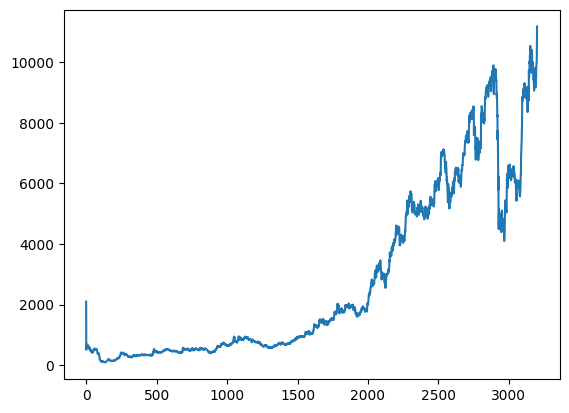

In [27]:
#Plot the True Pre Close Value
df["Prev Close"].plot()

In [32]:
#Set Target Variable
output_var = PD.DataFrame(df["Close"])
#Selecting the Features
features = ["Open", "High", "Low", "Volume"]

In [33]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,Open,High,Low,Volume
0,0.046908,0.046926,0.038296,0.501496
1,0.038202,0.046208,0.037377,0.693436
2,0.043609,0.051085,0.044140,0.731645
3,0.052099,0.054422,0.048221,0.721048
4,0.050793,0.051299,0.046394,0.487499


In [34]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [35]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

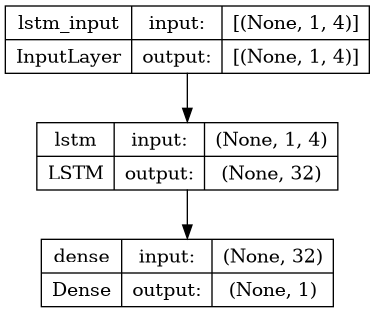

In [37]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [38]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
364/364 [==============================] - 7s 5ms/step - loss: 11804200.0000
Epoch 2/100
364/364 [==============================] - 2s 5ms/step - loss: 11736117.0000
Epoch 3/100
364/364 [==============================] - 2s 5ms/step - loss: 11652326.0000
Epoch 4/100
364/364 [==============================] - 2s 5ms/step - loss: 11548800.0000
Epoch 5/100
364/364 [==============================] - 2s 5ms/step - loss: 11427152.0000
Epoch 6/100
364/364 [==============================] - 2s 5ms/step - loss: 11289269.0000
Epoch 7/100
364/364 [==============================] - 2s 5ms/step - loss: 11136929.0000
Epoch 8/100
364/364 [==============================] - 2s 5ms/step - loss: 10971722.0000
Epoch 9/100
364/364 [==============================] - 2s 5ms/step - loss: 10795054.0000
Epoch 10/100
364/364 [==============================] - 2s 5ms/step - loss: 10608162.0000
Epoch 11/100
364/364 [==============================] - 2s 5ms/step - loss: 10412153.0000
Epoch 12/100
364/36

In [39]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 2ms/step


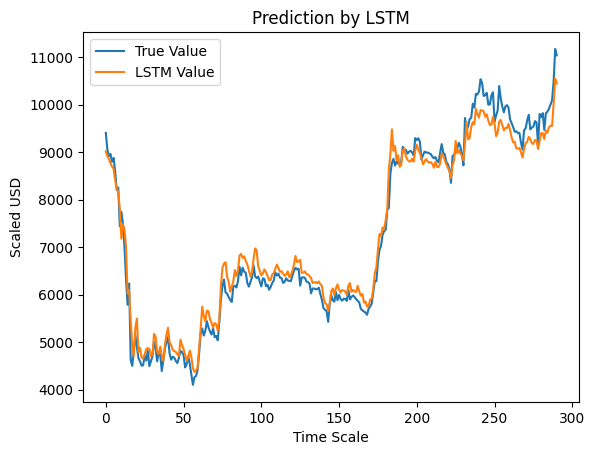

In [43]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title('Prediction by LSTM')
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [44]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=50, batch_size=9, verbose=1, shuffle=False)

Epoch 1/50
324/324 [==============================] - 2s 5ms/step - loss: 12687.9258
Epoch 2/50
324/324 [==============================] - 2s 5ms/step - loss: 11545.0420
Epoch 3/50
324/324 [==============================] - 2s 5ms/step - loss: 10596.3096
Epoch 4/50
324/324 [==============================] - 2s 5ms/step - loss: 9706.6758
Epoch 5/50
324/324 [==============================] - 2s 5ms/step - loss: 8902.5117
Epoch 6/50
324/324 [==============================] - 2s 5ms/step - loss: 8185.7910
Epoch 7/50
324/324 [==============================] - 2s 5ms/step - loss: 7553.5156
Epoch 8/50
324/324 [==============================] - 1s 5ms/step - loss: 7001.0215
Epoch 9/50
324/324 [==============================] - 1s 5ms/step - loss: 6522.5854
Epoch 10/50
324/324 [==============================] - 1s 5ms/step - loss: 6111.4648
Epoch 11/50
324/324 [==============================] - 2s 5ms/step - loss: 5760.3130
Epoch 12/50
324/324 [==============================] - 2s 5ms/step - lo

In [45]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 2ms/step


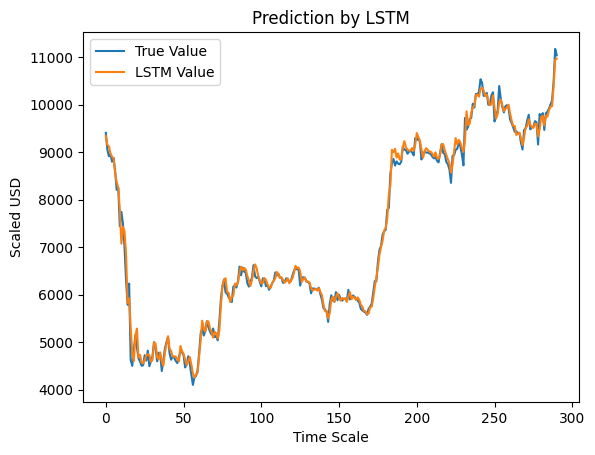

In [46]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title('Prediction by LSTM')
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [47]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1, shuffle=False)

Epoch 1/300
91/91 [==============================] - 0s 5ms/step - loss: 3292.9341
Epoch 2/300
91/91 [==============================] - 0s 5ms/step - loss: 3281.6423
Epoch 3/300
91/91 [==============================] - 0s 5ms/step - loss: 3245.4292
Epoch 4/300
91/91 [==============================] - 0s 5ms/step - loss: 3214.3372
Epoch 5/300
91/91 [==============================] - 0s 5ms/step - loss: 3188.2866
Epoch 6/300
91/91 [==============================] - 0s 5ms/step - loss: 3165.0439
Epoch 7/300
91/91 [==============================] - 0s 5ms/step - loss: 3143.6626
Epoch 8/300
91/91 [==============================] - 0s 5ms/step - loss: 3123.4956
Epoch 9/300
91/91 [==============================] - 0s 5ms/step - loss: 3104.2109
Epoch 10/300
91/91 [==============================] - 0s 5ms/step - loss: 3085.5901
Epoch 11/300
91/91 [==============================] - 0s 5ms/step - loss: 3067.4944
Epoch 12/300
91/91 [==============================] - 0s 5ms/step - loss: 3049.8320
E

In [48]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 2ms/step


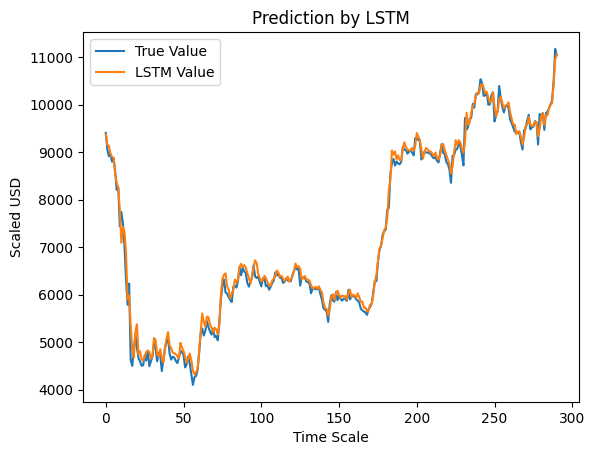

In [49]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title('Prediction by LSTM')
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [50]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, shuffle=False)

Epoch 1/500
91/91 [==============================] - 0s 5ms/step - loss: 1696.1788
Epoch 2/500
91/91 [==============================] - 0s 5ms/step - loss: 1695.1569
Epoch 3/500
91/91 [==============================] - 0s 5ms/step - loss: 1694.1375
Epoch 4/500
91/91 [==============================] - 0s 5ms/step - loss: 1693.1196
Epoch 5/500
91/91 [==============================] - 0s 5ms/step - loss: 1692.1063
Epoch 6/500
91/91 [==============================] - 0s 5ms/step - loss: 1691.0953
Epoch 7/500
91/91 [==============================] - 0s 5ms/step - loss: 1690.0868
Epoch 8/500
91/91 [==============================] - 0s 5ms/step - loss: 1689.0813
Epoch 9/500
91/91 [==============================] - 0s 5ms/step - loss: 1688.0808
Epoch 10/500
91/91 [==============================] - 0s 5ms/step - loss: 1687.0826
Epoch 11/500
91/91 [==============================] - 0s 5ms/step - loss: 1686.0848
Epoch 12/500
91/91 [==============================] - 0s 5ms/step - loss: 1685.0918
E

In [51]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 2ms/step


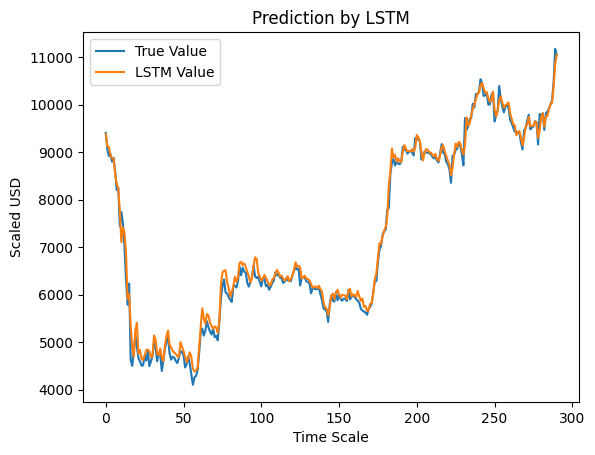

In [52]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title('Prediction by LSTM')
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()